In [16]:
import os
import codecs

data_directory = os.path.join('..', 'data')

businesses_filepath = os.path.join(data_directory,
                                   'business.json')

with codecs.open(businesses_filepath, encoding='utf_8') as f:
    first_business_record = f.readline() 

print(first_business_record)

{"business_id": "YDf95gJZaq05wvo7hTQbbQ", "name": "Richmond Town Square", "neighborhood": "", "address": "691 Richmond Rd", "city": "Richmond Heights", "state": "OH", "postal_code": "44143", "latitude": 41.5417162, "longitude": -81.4931165, "stars": 2.0, "review_count": 17, "is_open": 1, "attributes": {"RestaurantsPriceRange2": 2, "BusinessParking": {"garage": false, "street": false, "validated": false, "lot": true, "valet": false}, "BikeParking": true, "WheelchairAccessible": true}, "categories": ["Shopping", "Shopping Centers"], "hours": {"Monday": "10:00-21:00", "Tuesday": "10:00-21:00", "Friday": "10:00-21:00", "Wednesday": "10:00-21:00", "Thursday": "10:00-21:00", "Sunday": "11:00-18:00", "Saturday": "10:00-21:00"}}



In [17]:
type(first_business_record)

str

In [18]:
review_json_filepath = os.path.join(data_directory,
                                    'review.json')

with codecs.open(review_json_filepath, encoding='utf_8') as f:
    first_review_record = f.readline()
    
print(first_review_record)

{"review_id":"VfBHSwC5Vz_pbFluy07i9Q","user_id":"cjpdDjZyprfyDG3RlkVG3w","business_id":"uYHaNptLzDLoV_JZ_MuzUA","stars":5,"date":"2016-07-12","text":"My girlfriend and I stayed here for 3 nights and loved it. The location of this hotel and very decent price makes this an amazing deal. When you walk out the front door Scott Monument and Princes street are right in front of you, Edinburgh Castle and the Royal Mile is a 2 minute walk via a close right around the corner, and there are so many hidden gems nearby including Calton Hill and the newly opened Arches that made this location incredible.\n\nThe hotel itself was also very nice with a reasonably priced bar, very considerate staff, and small but comfortable rooms with excellent bathrooms and showers. Only two minor complaints are no telephones in room for room service (not a huge deal for us) and no AC in the room, but they have huge windows which can be fully opened. The staff were incredible though, letting us borrow umbrellas for t

In [20]:
import json

restaurant_ids = set()

# open the businesses file
with codecs.open(businesses_filepath, encoding='utf_8') as f:
    
    # iterate through each line (json record) in the file
    for business_json in f:
        
        # convert the json record to a Python dict
        business = json.loads(business_json)
        
        # if this business is not a restaurant, skip to the next one
        if u'Restaurants' not in business[u'categories']:
            continue
        #if u'pizza' not in business[u'state']:
            #continue
            
        # add the restaurant business id to our restaurant_ids set
        restaurant_ids.add(business[u'business_id'])

# turn restaurant_ids into a frozenset, as we don't need to change it anymore
restaurant_ids = frozenset(restaurant_ids)

# print the number of unique restaurant ids in the dataset
print('{:,}'.format(len(restaurant_ids)), u'restaurants in the dataset.')

51,613 restaurants in the dataset.


In [21]:
business

{'address': '540 Marks St',
 'attributes': {'BikeParking': True,
  'BusinessAcceptsCreditCards': True,
  'BusinessParking': {'garage': False,
   'lot': True,
   'street': False,
   'valet': False,
   'validated': False},
  'RestaurantsPriceRange2': 1,
  'WheelchairAccessible': True},
 'business_id': 'scMIE4jyGp7FkWrMKAgjxA',
 'categories': ['Fashion',
  'Shopping',
  'Food',
  'Department Stores',
  'Mobile Phones',
  'Grocery'],
 'city': 'Henderson',
 'hours': {},
 'is_open': 0,
 'latitude': 36.0607079,
 'longitude': -115.0332406,
 'name': 'Walmart',
 'neighborhood': '',
 'postal_code': '89014',
 'review_count': 42,
 'stars': 2.5,
 'state': 'NV'}

In [22]:
len(business)

15

Next, we will create a new file that contains only the text from reviews about restaurants, with one review per line in the file.

In [23]:
intermediate_directory = os.path.join('..', 'intermediate')

review_txt_filepath = os.path.join(intermediate_directory,
                                   'review_text_all.txt')

In [24]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:
    
    review_count = 0

    # create & open a new file in write mode
    with codecs.open(review_txt_filepath, 'wb', encoding='utf_8') as review_txt_file:

        # open the existing review json file
        with codecs.open(review_json_filepath, encoding='utf_8') as review_json_file:

            # loop through all reviews in the existing file and convert to dict
            for review_json in review_json_file:
                review = json.loads(review_json)

                # if this review is not about a restaurant, skip to the next one
                if review[u'business_id'] not in restaurant_ids:
                    continue
                
                if 'pizza' not in review[u'text']:
                    continue

                # write the restaurant review as a line in the new file
                # escape newline characters in the original review text
                review_txt_file.write(review[u'text'].replace('\n', '\\n') + '\n')
                review_count += 1

    print(u'''Text from {:,} restaurant reviews
              written to the new txt file.'''.format(review_count))
    
else:
    
    with codecs.open(review_txt_filepath, encoding='utf_8') as review_txt_file:
        for review_count, line in enumerate(review_txt_file):
            pass
        
    print(u'Text from {:,} restaurant reviews in the txt file.'.format(review_count + 1))

Text from 193,145 restaurant reviews in the txt file.
CPU times: user 4 s, sys: 38.7 ms, total: 4.04 s
Wall time: 4.06 s


In [25]:
import spacy
import pandas as pd
import itertools as it

nlp = spacy.load('en')

In [36]:
from gensim.models import Phrases
from gensim.models.word2vec import LineSentence

In [38]:
unigram_sentences_filepath = os.path.join(intermediate_directory,
                                          'unigram_sentences_all.txt')

In [39]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:

    with codecs.open(unigram_sentences_filepath, 'w', encoding='utf_8') as f:
        for sentence in lemmatized_sentence_corpus(review_txt_filepath):
            f.write(sentence + '\n')

CPU times: user 4 µs, sys: 1 µs, total: 5 µs
Wall time: 8.11 µs


In [40]:
unigram_sentences = LineSentence(unigram_sentences_filepath)

In [42]:
bigram_model_filepath = os.path.join(intermediate_directory, 'bigram_model_all')

In [43]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:

    bigram_model = Phrases(unigram_sentences)

    bigram_model.save(bigram_model_filepath)
    
# load the finished model from disk
bigram_model = Phrases.load(bigram_model_filepath)

CPU times: user 1.83 s, sys: 215 ms, total: 2.05 s
Wall time: 2.31 s


In [44]:
bigram_sentences_filepath = os.path.join(intermediate_directory,
                                         'bigram_sentences_all.txt')

In [45]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:

    with codecs.open(bigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for unigram_sentence in unigram_sentences:
            
            bigram_sentence = u' '.join(bigram_model[unigram_sentence])
            
            f.write(bigram_sentence + '\n')

CPU times: user 6 µs, sys: 1e+03 ns, total: 7 µs
Wall time: 11 µs


In [46]:
bigram_sentences = LineSentence(bigram_sentences_filepath)

In [48]:
trigram_model_filepath = os.path.join(intermediate_directory,
                                      'trigram_model_all')

In [49]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute modeling yourself.
if 0 == 1:

    trigram_model = Phrases(bigram_sentences)

    trigram_model.save(trigram_model_filepath)
    
# load the finished model from disk
trigram_model = Phrases.load(trigram_model_filepath)

CPU times: user 2.01 s, sys: 165 ms, total: 2.18 s
Wall time: 2.43 s


In [50]:
trigram_sentences_filepath = os.path.join(intermediate_directory,
                                          'trigram_sentences_all.txt')

In [51]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 1:

    with codecs.open(trigram_sentences_filepath, 'w', encoding='utf_8') as f:
        
        for bigram_sentence in bigram_sentences:
            
            trigram_sentence = u' '.join(trigram_model[bigram_sentence])
            
            f.write(trigram_sentence + '\n')

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.91 µs


In [52]:
trigram_sentences = LineSentence(trigram_sentences_filepath)

In [55]:
trigram_reviews_filepath = os.path.join(intermediate_directory,
                                        'trigram_transformed_reviews_all.txt')

In [56]:
from nltk.corpus import stopwords


In [57]:
%%time
#nlp = spacy.load('en')
# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.

STOPWORDS = stopwords.words()

if 0 == 1:

    with codecs.open(trigram_reviews_filepath, 'w', encoding='utf_8') as f:
        
        for parsed_review in nlp.pipe(line_review(review_txt_filepath),
                                      batch_size=10000):#, n_threads=4): nlp pipe does not support mThreading?
            
            # lemmatize the text, removing punctuation and whitespace
            unigram_review = [token.lemma_ for token in parsed_review
                              if not punct_space(token)]
            
            # apply the first-order and second-order phrase models
            bigram_review = bigram_model[unigram_review]
            trigram_review = trigram_model[bigram_review]
            
            # remove any remaining stopwords
            trigram_review = [term for term in trigram_review
                              if term not in STOPWORDS
                              #nlp.Defaults.STOPWORDS Not working
                             ]
            
            # write the transformed review as a line in the new file
            trigram_review = u' '.join(trigram_review)
            f.write(trigram_review + '\n')

CPU times: user 6.44 ms, sys: 8.81 ms, total: 15.3 ms
Wall time: 27.6 ms


In [59]:
from gensim.corpora import Dictionary, MmCorpus
from gensim.models.ldamulticore import LdaMulticore

import pyLDAvis
import pyLDAvis.gensim
import warnings
import _pickle as pickle

In [60]:
trigram_dictionary_filepath = os.path.join(intermediate_directory,
                                           'trigram_dict_all.dict')

In [61]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to learn the dictionary yourself.
if 0 == 1:

    trigram_reviews = LineSentence(trigram_reviews_filepath)

    # learn the dictionary by iterating over all of the reviews
    trigram_dictionary = Dictionary(trigram_reviews)
    
    # filter tokens that are very rare or too common from
    # the dictionary (filter_extremes) and reassign integer ids (compactify)
    trigram_dictionary.filter_extremes(no_below=10, no_above=0.4)
    trigram_dictionary.compactify()

    trigram_dictionary.save(trigram_dictionary_filepath)
    
# load the finished dictionary from disk
trigram_dictionary = Dictionary.load(trigram_dictionary_filepath)

CPU times: user 9.8 ms, sys: 3.19 ms, total: 13 ms
Wall time: 102 ms


In [62]:
trigram_reviews = LineSentence(trigram_reviews_filepath)

In [63]:
trigram_reviews 

In [64]:
trigram_bow_filepath = os.path.join(intermediate_directory,
                                    'trigram_bow_corpus_all.mm')

In [65]:
def trigram_bow_generator(filepath):
    """
    generator function to read reviews from a file
    and yield a bag-of-words representation
    """
    
    for review in LineSentence(filepath):
        yield trigram_dictionary.doc2bow(review)

In [66]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to build the bag-of-words corpus yourself.
if 0 == 1:

    # generate bag-of-words representations for
    # all reviews and save them as a matrix
    MmCorpus.serialize(trigram_bow_filepath,
                       trigram_bow_generator(trigram_reviews_filepath))
    
# load the finished bag-of-words corpus from disk
trigram_bow_corpus = MmCorpus(trigram_bow_filepath)

CPU times: user 23.8 ms, sys: 6.38 ms, total: 30.2 ms
Wall time: 158 ms


In [67]:
lda_model_filepath = os.path.join(intermediate_directory, 'lda_model_all')

In [68]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to train the LDA model yourself.
if 0 == 1:

    with warnings.catch_warnings():
        warnings.simplefilter('ignore')
        
        # workers => sets the parallelism, and should be
        # set to your number of physical cores minus one
        lda = LdaMulticore(trigram_bow_corpus,
                           num_topics=50,
                           id2word=trigram_dictionary,
                           workers=3)
    
    lda.save(lda_model_filepath)
    
# load the finished LDA model from disk
lda = LdaMulticore.load(lda_model_filepath)

CPU times: user 77.6 ms, sys: 27.6 ms, total: 105 ms
Wall time: 378 ms


In [69]:
def explore_topic(topic_number, topn=25):
    """
    accept a user-supplied topic number and
    print out a formatted list of the top terms
    """
        
    print(u'{:20} {}'.format(u'term', u'frequency') + u'\n')

    for term, frequency in lda.show_topic(topic_number, topn=25):
        print(u'{:20} {:.3f}'.format(term, round(frequency, 3)))

In [70]:
explore_topic(topic_number=49)

term                 frequency

gelato               0.023
coffee               0.018
get                  0.011
go                   0.010
time                 0.010
much                 0.009
one                  0.008
food                 0.006
terroni              0.006
try                  0.006
like                 0.006
little               0.005
really               0.005
back                 0.005
make                 0.005
cafe                 0.005
even                 0.005
well                 0.004
would                0.004
burrito              0.004
know                 0.004
pastry               0.004
open                 0.004
scoop                0.004
think                0.003


In [71]:
# ORIGINAL
# Setting topics to the top 2 similar responses
topic_names = {0: u'bar beer',
               1: u'great service',
               2: u'wing order',
               3: u'cheese crust',
               4: u'much order',
               5: u'$ get',
               6: u'great food',
               7: u'hoagie well',
               8: u'time party',
               9: u'poutine like',
               10: u'vegan great',
               11: u'kid food',
               12: u'bianco raw',
               13: u'make one',
               14: u'beer happy_hour',
               15: u'get like',
               16: u'topping make',
               17: u'go like',
               18: u'much get',
               19: u'food italian',
               20: u'owner restaurant',
               21: u'sandwich like',
               22: u'love salad',
               23: u'buffet breakfast',
               24: u'wait order',
               25: u'go great',
               26: u'rosa get',
               27: u'ask say',
               28: u'bianco_pizzaria menu',
               29: u'food restaurant',
               30: u'deep_dish cheese',
               31: u'slice burger',
               32: u'table one',
               33: u'salad wine',
               34: u'much pittsburgh',
               35: u'sauce crust',
               36: u'order call',
               37: u'great love',
               38: u'menu much',
               39: u'order make',
               40: u'get say',
               41: u'like really',
               42: u'time order',
               43: u'food dish',
               44: u'chicken buffet',
               45: u'gyro well',
               46: u'like much',
               47: u'well go',
               48: u'order sushi',
               49: u'gelato coffee'}

In [72]:
topic_names_filepath = os.path.join(intermediate_directory, 'topic_names.pkl')

with open(topic_names_filepath, 'wb') as f:
    pickle.dump(topic_names, f)

In [73]:
LDAvis_data_filepath = os.path.join(intermediate_directory, 'ldavis_prepared.pkl')

In [76]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to execute data prep yourself.
if 0 == 0:

    LDAvis_prepared = pyLDAvis.gensim.prepare(lda, trigram_bow_corpus,
                                              trigram_dictionary)

    #with open(LDAvis_data_filepath, 'wb') as f:
    #    pickle.dump(LDAvis_prepared, f)
        
# load the pre-prepared pyLDAvis data from disk
#with open(LDAvis_data_filepath) as f:
#    LDAvis_prepared = pickle.load(f)

/Users/user/anaconda3/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


CPU times: user 10min 21s, sys: 963 ms, total: 10min 22s
Wall time: 10min 32s


In [78]:
def get_sample_review(review_number):
    """
    retrieve a particular review index
    from the reviews file and return it
    """
    
    return list(it.islice(line_review(review_txt_filepath),
                          review_number, review_number+1))[0]

In [79]:
def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_review = [token.lemma_ for token in parsed_review
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_review = bigram_model[unigram_review]
    trigram_review = trigram_model[bigram_review]
    
    # remove any remaining stopwords
    trigram_review = [term for term in trigram_review
                      if not term in STOPWORDS]
    
    # create a bag-of-words representation
    review_bow = trigram_dictionary.doc2bow(trigram_review)
    
    # create an LDA representation
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    review_lda = sorted(review_lda, key=lambda topic_number_and_freq: -topic_number_and_freq[1])
    
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print('{:25} {}'.format(topic_names[topic_number], round(freq, 3)))

In [80]:
def lda_description(review_text, min_topic_freq=0.05):
    """
    accept the original text of a review and (1) parse it with spaCy,
    (2) apply text pre-proccessing steps, (3) create a bag-of-words
    representation, (4) create an LDA representation, and
    (5) print a sorted list of the top topics in the LDA representation
    """
    
    # parse the review text with spaCy
    parsed_review = nlp(review_text)
    
    # lemmatize the text and remove punctuation and whitespace
    unigram_review = [token.lemma_ for token in parsed_review
                      if not punct_space(token)]
    
    # apply the first-order and secord-order phrase models
    bigram_review = bigram_model[unigram_review]
    trigram_review = trigram_model[bigram_review]
    
    # remove any remaining stopwords
    trigram_review = [term for term in trigram_review
                      if not term in STOPWORDS]
    
    # create a bag-of-words representation
    review_bow = trigram_dictionary.doc2bow(trigram_review)
    
    # create an LDA representation
    review_lda = lda[review_bow]
    
    # sort with the most highly related topics first
    review_lda = sorted(review_lda, key=lambda topic_number_and_freq: -topic_number_and_freq[1])
    
    for topic_number, freq in review_lda:
        if freq < min_topic_freq:
            break
            
        # print the most highly related topic names and frequencies
        print('{:25} {}'.format(topic_names[topic_number], round(freq, 3)))

In [82]:
from gensim.models import Word2Vec

trigram_sentences = LineSentence(trigram_sentences_filepath)
word2vec_filepath = os.path.join(intermediate_directory, 'word2vec_model_all')

In [83]:
%%time

# this is a bit time consuming - make the if statement True
# if you want to train the word2vec model yourself.
if 0 == 1:

    # initiate the model and perform the first epoch of training
    food2vec = Word2Vec(trigram_sentences, size=100, window=5,
                        min_count=20, sg=1, workers=4)
    
    food2vec.save(word2vec_filepath)

    # perform another 11 epochs of training
    for i in range(1,12):

        food2vec.train(trigram_sentences, 
                       total_examples=food2vec.corpus_count, 
                       epochs=food2vec.iter)#, total_examples=corpus_count, epochs=iter)
        food2vec.save(word2vec_filepath)
        
# load the finished model from disk
food2vec = Word2Vec.load(word2vec_filepath)
food2vec.init_sims()

print(u'{} training epochs so far.'.format(food2vec.train_count))

12 training epochs so far.
CPU times: user 165 ms, sys: 31.7 ms, total: 196 ms
Wall time: 360 ms


In [85]:
print(u'{:,} terms in the food2vec vocabulary.'.format(len(food2vec.wv.vocab)))

16,752 terms in the food2vec vocabulary.


In [86]:
# build a list of the terms, integer indices,
# and term counts from the food2vec model vocabulary
ordered_vocab = [(term, voc.index, voc.count)
                 for term, voc in food2vec.wv.vocab.items()]

# sort by the term counts, so the most common terms appear first
ordered_vocab = sorted(ordered_vocab, key=lambda term_index_count: -term_index_count[1])

# unzip the terms, integer indices, and counts into separate lists
ordered_terms, term_indices, term_counts = zip(*ordered_vocab)

# create a DataFrame with the food2vec vectors as data,
# and the terms as row labels
word_vectors = pd.DataFrame(food2vec.wv.syn0norm[term_indices, :],
                            index=ordered_terms)

word_vectors

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
shipwreck_burger,-0.008992,0.069071,-0.044403,-0.066379,-0.110571,-0.051169,0.096304,0.020024,0.033676,-0.148641,...,-0.116319,-0.141442,-0.031097,-0.092572,0.182790,0.024603,0.068332,-0.093378,0.032352,0.063388
fat_uncle_tony,-0.110202,0.124813,0.024812,-0.116159,0.239851,0.057880,0.018485,0.161749,0.024854,0.074692,...,0.045939,-0.074423,-0.024706,-0.006327,0.113073,0.184647,0.044923,-0.068010,0.037040,-0.089825
dianoia,-0.076524,0.178293,-0.033832,0.115640,0.043627,0.158894,0.154938,0.072801,0.071337,-0.077997,...,-0.052969,-0.049967,0.075205,-0.054349,0.098447,0.025781,-0.023025,-0.035267,0.073016,-0.060536
lamb_chorizo,-0.115281,0.116881,0.059889,0.090417,0.036778,0.034917,-0.024799,0.172585,0.021246,0.043193,...,-0.080942,0.068433,0.016908,0.045230,0.045128,0.104081,0.159248,-0.066578,0.007341,0.064715
organ_music,-0.049580,-0.123448,0.139327,0.040766,-0.093590,0.176509,-0.108355,-0.063220,-0.013871,0.020749,...,0.014698,0.006284,-0.097220,-0.056107,-0.158724,-0.071799,-0.026583,0.028074,-0.068363,-0.097564
secret_hallway,-0.011642,0.007484,-0.015406,0.147396,-0.061920,-0.062190,-0.090432,0.142934,-0.017427,-0.092649,...,-0.056522,-0.127429,-0.080508,0.077457,0.084034,-0.116520,-0.086455,0.104335,0.011970,0.142961
5am,0.064431,0.013835,-0.101313,0.066900,-0.139770,0.105381,-0.216017,0.086563,-0.062952,-0.033686,...,-0.128176,-0.069481,0.009166,0.165028,0.023574,-0.016147,-0.039076,0.138584,0.040436,-0.069485
apiecalypse,-0.189204,0.015161,0.094419,-0.101405,-0.085885,0.050780,-0.029000,0.145084,0.056160,0.155907,...,0.077971,-0.122632,-0.172046,0.116918,0.071860,0.039033,-0.064204,0.038068,0.036973,-0.160624
jicama_fry,-0.040205,0.169634,0.004891,0.082035,-0.132468,0.064700,0.086396,0.129385,-0.026789,-0.144426,...,-0.031000,0.045968,0.007623,-0.015678,0.237579,-0.151209,0.134013,0.115267,0.083593,-0.109475
joanna,0.042130,0.051496,-0.023502,-0.024183,0.220385,0.064851,0.178014,0.093679,0.058013,-0.028825,...,-0.057799,-0.059719,0.015825,-0.007224,-0.094543,-0.010705,0.086375,-0.033077,-0.097246,0.027874


In [92]:
def word_algebra(add=[], subtract=[], topn=1):
    """
    combine the vectors associated with the words provided
    in add= and subtract=, look up the topn most similar
    terms to the combined vector, and print the result(s)
    """
    answers = food2vec.most_similar(positive=add, negative=subtract, topn=topn)
    
    for term, similarity in answers:
        print(term)

In [104]:
from sklearn.manifold import TSNE

In [105]:
tsne_input = word_vectors.drop(STOPWORDS, errors=u'ignore')
tsne_input = tsne_input.head(5000)

In [107]:
tsne_filepath = os.path.join(intermediate_directory,
                             u'tsne_model')

tsne_vectors_filepath = os.path.join(intermediate_directory,
                                     u'tsne_vectors.npy')

In [108]:
%%time

if 0 == 1:
    
    tsne = TSNE()
    tsne_vectors = tsne.fit_transform(tsne_input.values)
    
    with open(tsne_filepath, 'wb') as f:
        pickle.dump(tsne, f)

    pd.np.save(tsne_vectors_filepath, tsne_vectors)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.91 µs


In [109]:
#with open(tsne_filepath) as f:
#    tsne = pickle.load(f)
    
tsne_vectors = pd.np.load(tsne_vectors_filepath)

tsne_vectors = pd.DataFrame(tsne_vectors,
                            index=pd.Index(tsne_input.index),
                            columns=[u'x_coord', u'y_coord'])

In [111]:
tsne_vectors[u'word'] = tsne_vectors.index

In [128]:
tsneMatrix = tsne_vectors[['x_coord', 'y_coord']]

In [130]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
from sklearn.metrics import silhouette_score
i = []
m = np.matrix(tsne_vectors[['x_coord', 'y_coord']])
kernals = np.array(range(2, 25))
#clusterLabels = []
Sscores = []

for k in kernals:
    km = KMeans(n_clusters=k, init='random')
    i.append(km.fit(m).inertia_)
    clusterLabels = km.fit_predict(m)
    Sscores.append(silhouette_score(m, clusterLabels))
#Kdf = pd.DataFrame(i, kernals, Sscores).reset_index()

In [131]:
Kdf = pd.DataFrame(np.array(Sscores), np.array(kernals)).reset_index()

In [132]:
Kdf.columns = ['Kernals', 'Silhouette Score', ]

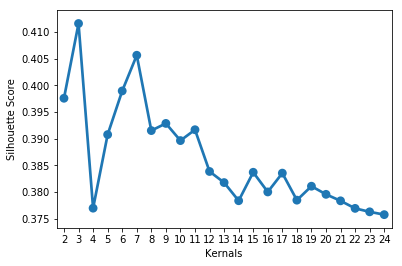

In [133]:
import matplotlib as plt
%matplotlib inline
sns.pointplot(x='Kernals', y = 'Silhouette Score', data = Kdf)

It appears that the optimal number of kernals is 3, though perhaps 7 will work better if it appears that 3 is not enough

In [134]:
km3 = KMeans(n_clusters = 3, init = 'random')
km7 = KMeans(n_clusters = 7, init = 'random')


In [135]:
tsneMatrix.head()

,x_coord,y_coord
shipwreck_burger,27.015017,46.453449
fat_uncle_tony,42.558170,31.833025
dianoia,16.950874,-32.293430
lamb_chorizo,31.650385,43.383331
organ_music,-17.115101,-14.246554


In [119]:
cluster = tsneMatrix

In [122]:
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN

cluster['cluster3kmean'] = km3.fit_predict(tsneMatrix)
cluster['cluster7kmean'] = km7.fit_predict(tsneMatrix)
cluster['clusterdbscan'] = DBSCAN(eps=1.0).fit_predict(tsneMatrix)

In [136]:
ClusteredM = tsneMatrix

In [137]:
ClusteredM.head()

,x_coord,y_coord
shipwreck_burger,27.015017,46.453449
fat_uncle_tony,42.558170,31.833025
dianoia,16.950874,-32.293430
lamb_chorizo,31.650385,43.383331
organ_music,-17.115101,-14.246554


In [138]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(affinity = 'nearest_neighbors', assign_labels = 'kmeans')

In [139]:
ClusteredM['cluster'] = sc.fit_predict(tsneMatrix)

In [140]:
ClusteredM.head()

,x_coord,y_coord,cluster
shipwreck_burger,27.015017,46.453449,3
fat_uncle_tony,42.558170,31.833025,3
dianoia,16.950874,-32.293430,2
lamb_chorizo,31.650385,43.383331,3
organ_music,-17.115101,-14.246554,6


In [141]:
np.unique(ClusteredM.cluster)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [142]:
ClusteredM.head()
t = ClusteredM.reset_index()
t.columns = ['word', 'x_coord', 'y_coord', 'cluster']

### Plotting with Bokeh

In [143]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value

output_notebook()

Loading BokehJS ...

In [661]:
# add our DataFrame as a ColumnDataSource for Bokeh
plot_data = ColumnDataSource(tsneMatrix)

# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'), #, resize
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=plot_data,
                 color=u'cluster', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coord, y_coord [renderer: GlyphRenderer(id='10abb41a-76ae-47d7-a238-53b4ad79d7df', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coor, y_coor [renderer: GlyphRenderer(id='224de2f8-9960-47bd-b583-fc526799ec3e', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coor, y_coor [renderer: GlyphRenderer(id='4a14db9a-70b6-49f4-9aef-355d4636aba0', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coor, y_coor [renderer: GlyphRenderer(id='84bed822-ce25-40fb-bad8-bffcb5b38c34', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coor, y_coor [renderer: GlyphRenderer(id='a8200f8c-c604-42cd-981c-15e252f9424c', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column name: x_coor, y_coor [renderer: GlyphRenderer(id='bc451bf0-cb73-450f-9ce5-59dee52edcfd', ...)]
E-1001 (BAD_COLUMN_NAME): Glyph refers to nonexistent column n

In [591]:

ClusteredM.describe()

,x_coord,y_coord,cluster
count,5000.000000,5000.000000,5000.000000
mean,0.404878,0.934650,3.158600
std,28.093380,30.798782,1.910229
min,-62.115566,-63.852104,0.000000
25%,-20.918108,-23.172061,2.000000
50%,0.633059,-1.501964,3.000000
75%,22.649648,27.643837,5.000000
max,59.165852,62.790535,7.000000


In [147]:
ClusteredM = ClusteredM.reset_index()
ClusteredM.columns = ['words', 'x_coord', 'y_coord', 'cluster']

In [146]:
ClusteredM.head()

,x_coord,y_coord,cluster
shipwreck_burger,27.015017,46.453449,3
fat_uncle_tony,42.558170,31.833025,3
dianoia,16.950874,-32.293430,2
lamb_chorizo,31.650385,43.383331,3
organ_music,-17.115101,-14.246554,6


In [166]:
#add our DataFrame as a ColumnDataSource for Bokeh
#plot_data = ColumnDataSource(tsneMatrix)
from bokeh.resources import CDN
from bokeh.embed import file_html
from bokeh.io import output_file, show




tsne_plot = figure(title=u't-SNE Word Embeddings',
                   output_backend="webgl",
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'), #, resize
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@words') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 0]),
                 color=u'Purple', line_alpha=0.2, fill_alpha=0.1, 
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 1]),#legend = u'cluster',
                 color=u'navy', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 2]),#legend = u'cluster',
                color=u'orange', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 3]),#legend = u'cluster',
                 color=u'red', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 4]),#legend = u'cluster',
                 color=u'blue', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 5]),#legend = u'cluster',
                 color=u'yellow', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 6]),#legend = u'cluster',
                 color=u'green', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coord', u'y_coord', source=ColumnDataSource(ClusteredM[ClusteredM.cluster == 7]),#legend = u'cluster',
                 color=u'pink', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
#show(tsne_plot);
output_file('PizzaClusteringWebGL.html')
#show(tsne_plot)

In [345]:
#add our DataFrame as a ColumnDataSource for Bokeh
#plot_data = ColumnDataSource(tsneMatrix)

# 7 Kmeans kernals

plotData20 = ColumnDataSource(tsneMatrixCluster20)
plotData21 = ColumnDataSource(tsneMatrixCluster21)
plotData22 = ColumnDataSource(tsneMatrixCluster22)
plotData23 = ColumnDataSource(tsneMatrixCluster23)
plotData24 = ColumnDataSource(tsneMatrixCluster24)
plotData25 = ColumnDataSource(tsneMatrixCluster25)
plotData26 = ColumnDataSource(tsneMatrixCluster26)

#colorList = ['#d18096', '#483496', '#00FFD0']
#labels = tsneMatrix['cluster'].astype(int)
#colors = colorList[labels]
# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'), #, resize
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData20,
                 color=u'Purple', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData21,
                 color=u'navy', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData22,
                 color=u'orange', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData23,
                 color=u'red', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData24,
                 color=u'green', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData25,
                 color=u'yellow', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData26,
                 color=u'pink', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')




# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);

In [343]:
#add our DataFrame as a ColumnDataSource for Bokeh
#plot_data = ColumnDataSource(tsneMatrix)
# 3 Kmeans kernals

plotData0 = ColumnDataSource(tsneMatrixCluster0)
plotData1 = ColumnDataSource(tsneMatrixCluster1)
plotData2 = ColumnDataSource(tsneMatrixCluster2)

#colorList = ['#d18096', '#483496', '#00FFD0']
#labels = tsneMatrix['cluster'].astype(int)
#colors = colorList[labels]
# create the plot and configure the
# title, dimensions, and tools
tsne_plot = figure(title=u't-SNE Word Embeddings',
                   plot_width = 800,
                   plot_height = 800,
                   tools= (u'pan, wheel_zoom, box_zoom,'
                           u'box_select, reset'), #, resize
                   active_scroll=u'wheel_zoom')

# add a hover tool to display words on roll-over
tsne_plot.add_tools( HoverTool(tooltips = u'@word') )

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData0,
                 color=u'Purple', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')

# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData1,
                 color=u'navy', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')


# draw the words as circles on the plot
tsne_plot.circle(u'x_coor', u'y_coor', source=plotData2,
                 color=u'orange', line_alpha=0.2, fill_alpha=0.1,
                 size=10, hover_line_color=u'black')





# configure visual elements of the plot
tsne_plot.title.text_font_size = value(u'16pt')
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# engage!
show(tsne_plot);